In [1]:
#An attempt to predict the NBA MVP based on their stats. MVP should be player
#that provides most VAlUE to teams, meaning wins. Player should be dominant
#on offense and defense.
# I expect some issues to stem from the fact that there is only 1 MVP each year,
#leading to a relativly small sample of players who actually won it. In addition,
#the NBA has changed drastically, in terms of play style, from even the early
#2000's until now. This could make it dificult to make accurate preditions about
#today's players based on data from the past.
#Data from basketball-reference.com, thank you to them!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import player stats from basketball-reference.com#
df2018_2019_stats = pd.read_csv("2018_2019 Player Stats.csv")

In [229]:
#stats include Player Name, Position, Age, Team, Games Played, Games started
#Minutes Played, Field Goals Made, FG Attempts, FG% etc
df2018_2019_stats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [3]:
#import advanced stats
df2018_2019_adv = pd.read_csv('2018_2019 Advanced.csv')

In [97]:
#advanced stats include:
df2018_2019_adv.columns

Index(['Rk', 'PER', 'TS%', 'FTr', 'USG%', 'Unnamed: 5', 'OWS', 'DWS', 'WS',
       'WS/48', 'Unnamed: 10', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [4]:
#drop empty columns
df2018_2019_adv.drop(['Unnamed: 10','Unnamed: 5'],axis=1,inplace=True)

In [7]:
df2018_2019_adv.info

<bound method DataFrame.info of       Rk   PER    TS%    FTr  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  \
0      1   6.3  0.507  0.083  12.2  0.1  0.6  0.6  0.053  -3.7   0.4 -3.3   
1      2   2.9  0.379  0.556   9.2 -0.1  0.0 -0.1 -0.022  -7.6  -0.5 -8.1   
2      3   7.6  0.474  0.082  13.5 -0.1  0.2  0.1  0.011  -3.8  -0.5 -4.3   
3      4  18.5  0.591  0.361  16.4  5.1  4.0  9.1  0.163   0.7   0.4  1.1   
4      5  17.9  0.623  0.465  15.8  3.4  3.4  6.8  0.171  -0.4   2.2  1.8   
..   ...   ...    ...    ...   ...  ...  ...  ...    ...   ...   ...  ...   
703  528  19.4  0.640  0.643  21.8  0.2  0.1  0.3  0.191  -2.3  -1.9 -4.3   
704  529  16.2  0.590  0.399  18.2  1.7  0.3  2.0  0.087  -1.1  -2.1 -3.2   
705  530  18.9  0.604  0.332  20.3  1.9  1.3  3.2  0.148  -0.2  -0.2 -0.5   
706  530  19.5  0.633  0.342  20.5  1.1  0.6  1.8  0.165  -0.3   0.1 -0.2   
707  530  18.3  0.574  0.323  20.1  0.7  0.7  1.4  0.132  -0.2  -0.5 -0.7   

     VORP  
0    -0.2  
1    -0.2  
2    -0

In [7]:
df2018_2019_stats.info

<bound method DataFrame.info of       Rk                  Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0      1  Álex Abrines\abrinal01  SG   25  OKC  31   2  19.0  1.8   5.1  ...   
1      2      Quincy Acy\acyqu01  PF   28  PHO  10   0  12.3  0.4   1.8  ...   
2      3  Jaylen Adams\adamsja01  PG   22  ATL  34   1  12.6  1.1   3.2  ...   
3      4  Steven Adams\adamsst01   C   25  OKC  80  80  33.4  6.0  10.1  ...   
4      5   Bam Adebayo\adebaba01   C   21  MIA  82  28  23.3  3.4   5.9  ...   
..   ...                     ...  ..  ...  ...  ..  ..   ...  ...   ...  ...   
703  528  Tyler Zeller\zellety01   C   29  MEM   4   1  20.5  4.0   7.0  ...   
704  529    Ante Žižić\zizican01   C   22  CLE  59  25  18.3  3.1   5.6  ...   
705  530   Ivica Zubac\zubaciv01   C   21  TOT  59  37  17.6  3.6   6.4  ...   
706  530   Ivica Zubac\zubaciv01   C   21  LAL  33  12  15.6  3.4   5.8  ...   
707  530   Ivica Zubac\zubaciv01   C   21  LAC  26  25  20.2  3.8   7.2  ...   

       

In [5]:
#merge the advanced stats and regular stats dfs using both of their indexes
df2019 = pd.merge(df2018_2019_stats,df2018_2019_adv,left_index=True, right_index=True)

In [11]:
df2019.info

<bound method DataFrame.info of      Rk_x                  Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0       1  Álex Abrines\abrinal01  SG   25  OKC  31   2  19.0  1.8   5.1  ...   
1       2      Quincy Acy\acyqu01  PF   28  PHO  10   0  12.3  0.4   1.8  ...   
2       3  Jaylen Adams\adamsja01  PG   22  ATL  34   1  12.6  1.1   3.2  ...   
3       4  Steven Adams\adamsst01   C   25  OKC  80  80  33.4  6.0  10.1  ...   
4       5   Bam Adebayo\adebaba01   C   21  MIA  82  28  23.3  3.4   5.9  ...   
..    ...                     ...  ..  ...  ...  ..  ..   ...  ...   ...  ...   
703   528  Tyler Zeller\zellety01   C   29  MEM   4   1  20.5  4.0   7.0  ...   
704   529    Ante Žižić\zizican01   C   22  CLE  59  25  18.3  3.1   5.6  ...   
705   530   Ivica Zubac\zubaciv01   C   21  TOT  59  37  17.6  3.6   6.4  ...   
706   530   Ivica Zubac\zubaciv01   C   21  LAL  33  12  15.6  3.4   5.8  ...   
707   530   Ivica Zubac\zubaciv01   C   21  LAC  26  25  20.2  3.8   7.2  ...

In [6]:
#drop players who played fewer than 40 games because per game stats could be
#misleading if player only played less than half a season
df2019.drop(df2019[df2019['G'] <40].index,inplace=True)
df2019.info

<bound method DataFrame.info of      Rk_x                       Player Pos  Age   Tm   G  GS    MP   FG   FGA  \
3       4       Steven Adams\adamsst01   C   25  OKC  80  80  33.4  6.0  10.1   
4       5        Bam Adebayo\adebaba01   C   21  MIA  82  28  23.3  3.4   5.9   
7       8  LaMarcus Aldridge\aldrila01   C   33  SAS  81  81  33.2  8.4  16.3   
10     11      Jarrett Allen\allenja01   C   20  BRK  80  80  26.2  4.2   7.1   
12     13    Al-Farouq Aminu\aminual01  PF   28  POR  81  81  28.3  3.2   7.3   
..    ...                          ...  ..  ...  ...  ..  ..   ...  ...   ...   
698   525     Thaddeus Young\youngth01  PF   30  IND  81  81  30.7  5.5  10.4   
699   526         Trae Young\youngtr01  PG   20  ATL  81  81  30.9  6.5  15.5   
700   527        Cody Zeller\zelleco01   C   26  CHO  49  47  25.4  3.9   7.0   
704   529         Ante Žižić\zizican01   C   22  CLE  59  25  18.3  3.1   5.6   
705   530        Ivica Zubac\zubaciv01   C   21  TOT  59  37  17.6  3.6   6.4

In [7]:
#add dummy variable for who won the MVP this year. Giannis Antetokounmpo won 
# in 2018-2019 and is located at index 19 in our df.
# Also added the year
df2019['MVP']=0
df2019.loc[19, 'MVP'] = 1

df2019['Year'] = 2019
df2019.head(20)

Rk_x                           Player    Pos  Age   Tm   G  GS    MP  \
3      4           Steven Adams\adamsst01      C   25  OKC  80  80  33.4   
4      5            Bam Adebayo\adebaba01      C   21  MIA  82  28  23.3   
7      8      LaMarcus Aldridge\aldrila01      C   33  SAS  81  81  33.2   
10    11          Jarrett Allen\allenja01      C   20  BRK  80  80  26.2   
12    13        Al-Farouq Aminu\aminual01     PF   28  POR  81  81  28.3   
13    14        Justin Anderson\anderju01     SF   25  ATL  48   4   9.6   
14    15          Kyle Anderson\anderky01     SF   25  MEM  43  40  29.8   
19    18  Giannis Antetokounmpo\antetgi01     PF   24  MIL  72  72  32.8   
22    21             OG Anunoby\anunoog01     SF   21  TOR  67   6  20.2   
23    22       Ryan Arcidiacono\arcidry01     PG   24  CHI  81  32  24.2   
24    23           Trevor Ariza\arizatr01     SF   33  TOT  69  69  34.0   
26    23           Trevor Ariza\arizatr01     SF   33  WAS  43  43  34.1   
27    24          D.J. Augustin\augusdj01     PG   31  ORL  81  81  28.0   
28    25          Deandre Ayton\aytonde01      C   20  PHO  71  70  30.7   
29    26           Dwayne Bacon\bacondw01     SG   23  CHO  43  13  17.7   
30    27      Marvin Bagley III\baglema01     PF   19  SAC  62   4  25.3   
35    30              Lonzo Ball\balllo01     PG   21  LAL  47  45  30.3   
36    31               Mo Bamba\bambamo01      C   20  ORL  47   1  16.3   
38    33        Harrison Barnes\barneha02  PF-SF   26  TOT  77  77  32.9   
39    33        Harrison Barnes\barneha02     PF   26  DAL  49  49  32.3   

      FG   FGA  ...  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  MVP  Year  
3    6.0  10.1  ...  5.1  4.0   9.1  0.163   0.7   0.4   1.1   2.1    0  2019  
4    3.4   5.9  ...  3.4  3.4   6.8  0.171  -0.4   2.2   1.8   1.8    0  2019  
7    8.4  16.3  ...  6.4  2.9   9.3  0.167   2.4  -0.6   1.8   2.6    0  2019  
10   4.2   7.1  ...  4.4  3.3   7.6  0.175   0.2   1.4   1.6   1.9    0  2019  
12   3.2   7.3  ...  3.0  2.8   5.8  0.121   0.1   0.6   0.7   1.5    0  2019  
13   1.3   3.3  ...  0.1  0.4   0.4  0.043  -2.4  -0.3  -2.7  -0.1    0  2019  
14   3.5   6.4  ...  0.8  1.8   2.7  0.100  -1.6   2.4   0.8   0.9    0  2019  
19  10.0  17.3  ...  8.9  5.5  14.4  0.292   6.3   4.1  10.4   7.4    1  2019  
22   2.7   6.0  ...  0.3  1.7   2.0  0.070  -2.4   0.1  -2.4  -0.1    0  2019  
23   2.3   5.2  ...  2.8  0.9   3.7  0.090  -2.0   0.1  -1.9   0.1    0  2019  
24   4.3  10.7  ...  1.3  1.2   2.5  0.052  -0.7  -0.6  -1.3   0.4    0  2019  
26   4.8  11.8  ...  1.1  0.8   1.9  0.062  -0.5  -0.9  -1.4   0.2    0  2019  
27   3.9   8.4  ...  5.0  1.9   6.9  0.146   1.1  -0.7   0.5   1.4    0  2019  
28   7.2  12.3  ...  4.1  1.7   5.8  0.128   1.3  -1.1   0.2   1.2    0  2019  
29   2.8   6.0  ...  0.9  0.3   1.2  0.073  -2.1  -1.6  -3.7  -0.3    0  2019  
30   5.7  11.4  ...  2.0  1.6   3.6  0.110   0.5  -1.5  -1.0   0.4    0  2019  
35   3.9   9.7  ... -0.2  1.7   1.6  0.052  -1.6   1.3  -0.3   0.6    0  2019  
36   2.5   5.2  ...  0.3  1.4   1.7  0.106  -2.8   1.4  -1.4   0.1    0  2019  
38   5.6  13.3  ...  2.0  1.6   3.6  0.068  -0.2  -1.2  -1.4   0.4    0  2019  
39   5.9  14.6  ...  0.8  1.1   1.9  0.059   0.0  -1.2  -1.2   0.3    0  2019  

[20 rows x 45 columns]

In [8]:
#i found that although Rudy Gobert had a good season, due to his position and
#playstyle he did not take 1 3 pointer all season. Thus he had a Nan as 3 point
#percentage and got wrongly dropped. Instead I decided to fill his 3P% with a 0
#to keep him in the data set.
df2019['3P%'].fillna(0)

3      0.000
4      0.200
7      0.238
10     0.133
12     0.343
       ...  
698    0.349
699    0.324
700    0.273
704    0.000
705    0.000
Name: 3P%, Length: 391, dtype: float64

In [14]:
df2019.info

<bound method DataFrame.info of      Rk_x                       Player Pos  Age   Tm   G  GS    MP   FG   FGA  \
3       4       Steven Adams\adamsst01   C   25  OKC  80  80  33.4  6.0  10.1   
4       5        Bam Adebayo\adebaba01   C   21  MIA  82  28  23.3  3.4   5.9   
7       8  LaMarcus Aldridge\aldrila01   C   33  SAS  81  81  33.2  8.4  16.3   
10     11      Jarrett Allen\allenja01   C   20  BRK  80  80  26.2  4.2   7.1   
12     13    Al-Farouq Aminu\aminual01  PF   28  POR  81  81  28.3  3.2   7.3   
..    ...                          ...  ..  ...  ...  ..  ..   ...  ...   ...   
698   525     Thaddeus Young\youngth01  PF   30  IND  81  81  30.7  5.5  10.4   
699   526         Trae Young\youngtr01  PG   20  ATL  81  81  30.9  6.5  15.5   
700   527        Cody Zeller\zelleco01   C   26  CHO  49  47  25.4  3.9   7.0   
704   529         Ante Žižić\zizican01   C   22  CLE  59  25  18.3  3.1   5.6   
705   530        Ivica Zubac\zubaciv01   C   21  TOT  59  37  17.6  3.6   6.4

In [9]:
#Time for some visual exploration of the data
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly.express as px
cf.go_offline()

In [16]:
df2019.head()

Rk_x                       Player Pos  Age   Tm   G  GS    MP   FG   FGA  \
3      4       Steven Adams\adamsst01   C   25  OKC  80  80  33.4  6.0  10.1   
4      5        Bam Adebayo\adebaba01   C   21  MIA  82  28  23.3  3.4   5.9   
7      8  LaMarcus Aldridge\aldrila01   C   33  SAS  81  81  33.2  8.4  16.3   
10    11      Jarrett Allen\allenja01   C   20  BRK  80  80  26.2  4.2   7.1   
12    13    Al-Farouq Aminu\aminual01  PF   28  POR  81  81  28.3  3.2   7.3   

    ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  MVP  
3   ...  16.4  5.1  4.0  9.1  0.163   0.7   0.4  1.1   2.1    0  
4   ...  15.8  3.4  3.4  6.8  0.171  -0.4   2.2  1.8   1.8    0  
7   ...  26.9  6.4  2.9  9.3  0.167   2.4  -0.6  1.8   2.6    0  
10  ...  15.9  4.4  3.3  7.6  0.175   0.2   1.4  1.6   1.9    0  
12  ...  13.7  3.0  2.8  5.8  0.121   0.1   0.6  0.7   1.5    0  

[5 rows x 44 columns]

In [17]:
#This chart plots a players Offensive Win Share vs Defensive Win Share. Win Shares
#estimate how many wins a player contributed to that season. The size of each dot is the
#players per minute production (PER) and the color shows Giannis, the MVP.
#
fig = px.scatter(df2019, x='OWS', y='DWS', color = 'MVP',hover_name='Player',size='PER')
fig.show()
#Interestingly, this shows Rudy Gobert played at a very similar level, albeit lower
#PER, to Giannis. However he recieved only 1 point in the voting compared to 
#Giannis' 941. Giannis, Rudy, and James Harden are far ahead in total win share,
#with 

In [18]:
fig = px.strip(df2019, x='Pos', y='WS/48', color='MVP',hover_name='Player')
fig.show()

#This chart shows the Combined Win Share/48 minutes (length of game), separated by position. 
#This shows how much a player would contribute to a win if they were on the court every second
#and accounts for differences in the amount of minutes a player recieves.
#Giannis clearly leads, followed by the underappreciated Rudy Gobert and the runner-up
#in MVP voting, James Harden.
#Interestingly, the average WS/48 changes greatly depending on your position;
#maybe this is why Gobert, a Center, wasn't considered for MVP?
#A side note, why would the voters consider this metric? A players value
#cannot really be normalized based on the amount of time they play. Just because
#you create more wins/minute, if you play fewer minutes, you get fewer wins. And
#at the end of the day, the winner should be based on total value, not hypothetical
#value if they played more, but I digress.

In [23]:
fig = px.scatter(df2019, x= 'VORP',color='MVP',hover_name='Player',
                 marginal_x='violin',
                 color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

#This is a scatter plot of Value over Replacement, a box score estimate of the 
#points per 100 TEAM possesions that a player contributed above a replacement-level
#(-2.0) player, prorated to an 82 game season. The color, once again, signals
#where the MVP is. The Violin plot on top shows the distribution of VORP.
#James Harden has a 1.9 point lead over Giannis in VORP. Rudy falls over here
#but maintains a respectable 4.8, putting him in the company of LeBron, Blake
#Griffin, Kawhi Leonard and others. It does appear decent centers are easier to find.

In [259]:
#Now my question is why didn't James Harden win the MVP in 2019? He has a higher
#VORP and Win Share, 2 statistics that clearly show his greater value to the team.
#I believe it is because MVP voters are not computers, they are humans. They
#follow the narratives of Basketball and lots of people don't like the way
#James Harden plays basketball. Many view it as selfish and they don't like
#how many fouls he draws.
fig = px.scatter(df2018_2019, x='Pos', y='FTr',hover_name='Player',size='FGA',color='MVP')
fig.show()

#This plot shows that although Harden does lead his position in FTr, the number
#of Free Throw attempts/Field Goal Attempt, he trails behind Giannis and many
#others in the league. Part of this due to the nature of his position. Positions
#like Center, that tend to take shots near the basket get fouled more. However,
#Harden has a WIDE lead in Field Goals attempted/game (size of bubble) at 24.5.
#PGs who have a similar FTr (Ben Simmons and Jeremey Lin) attempt fewer than
#half as many FGs (12.2, 7.6). This means Harden DOES end up at the free throw
#line much more than average. Harden attempts, on average, 11 free throws/game;
#While Giannis attempts 9.5, Rudy Gobert attempts 6.4, and league leader in FTr,
#Tyson Chandler attempts only 1.6.

In [24]:
#Now that we've explored the 2019 season, we need to add data from other seasons.

In [10]:
#2018
#import regular stats
df2018_stats = pd.read_csv("2018 Stats.csv")
#import advanced stats
df2018_adv = pd.read_csv('2018 Adv.csv')

#merge
df2018 = pd.merge(df2018_stats,df2018_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2018.drop(df2018[df2018['G'] <40].index,inplace=True)
# Also added the year
df2018['Year'] = 2018

#fill in 0 for undefined 3P% for players who took no 3P shots
df2018['3P%'].fillna(0)

#drop rows with missing values
df2018.dropna(inplace=True)


In [11]:
#add dummy variable for who won the MVP this year. James Harden won in
#2018
df2018['MVP'] = 0

df2018.loc[df2018.index[df2018['Player'] == 'James Harden\hardeja01'], 'MVP'] = 1

In [18]:
df2018.info

<bound method DataFrame.info of     Rk_x                    Player Pos   Age   Tm     G    GS    MP   FG  \
0      1    Álex Abrines\abrinal01  SG  24.0  OKC  75.0   8.0  15.1  1.5   
1      2        Quincy Acy\acyqu01  PF  27.0  BRK  70.0   8.0  19.4  1.9   
2      3    Steven Adams\adamsst01   C  24.0  OKC  76.0  76.0  32.7  5.9   
3      4     Bam Adebayo\adebaba01   C  20.0  MIA  69.0  19.0  19.8  2.5   
4      5   Arron Afflalo\afflaar01  SG  32.0  ORL  53.0   3.0  12.9  1.2   
..   ...                       ...  ..   ...  ...   ...   ...   ...  ...   
656  535  Thaddeus Young\youngth01  PF  29.0  IND  81.0  81.0  32.2  5.2   
658  537    Tyler Zeller\zellety01   C  28.0  TOT  66.0  34.0  16.8  2.8   
659  537    Tyler Zeller\zellety01   C  28.0  BRK  42.0  33.0  16.7  3.0   
661  538     Paul Zipser\zipsepa01  SF  23.0  CHI  54.0  12.0  15.3  1.5   
663  540     Ivica Zubac\zubaciv01   C  20.0  LAL  43.0   0.0   9.5  1.4   

      FGA  ...  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  

In [10]:
df2018.loc[df2018.index[df2018['Player'] == 'James Harden\hardeja01']]

Rk_x                  Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
232  194  James Harden\hardeja01  SG  28.0  HOU  72.0  72.0  35.4  9.0  20.1   

     ...   OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP  Year  MVP  
232  ...  11.6  3.8  15.4  0.289   8.5   1.4  9.9   7.7  2018    1  

[1 rows x 45 columns]

In [12]:
#2017
#import regular stats
df2017_stats = pd.read_csv("2017 Stats.csv")
#import advanced stats
df2017_adv = pd.read_csv('2017 Adv.csv')

#merge
df2017 = pd.merge(df2017_stats,df2017_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2017.drop(df2017[df2017['G'] <40].index,inplace=True)
# Also added the year
df2017['Year'] = 2017

#fill in 0 for undefined 3P% for players who took no 3P shots
df2017['3P%'].fillna(0)

#drop rows with missing values
df2017.dropna(inplace=True)

#add dummy variable for who won the MVP this year. Russell Westbrook won in
#2017
df2017['MVP'] = 0

df2017.loc[df2017.index[df2017['Player'] == 'Russell Westbrook\westbru01'], 'MVP'] = 1

In [12]:
df2017.loc[df2017.index[df2017['Player'] == 'Russell Westbrook\westbru01']]

Rk_x                       Player Pos   Age   Tm     G    GS    MP    FG  \
558  458  Russell Westbrook\westbru01  PG  28.0  OKC  81.0  81.0  34.6  10.2   

      FGA  ...  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  Year  MVP  
558  24.0  ...  8.5  4.6  13.1  0.224   8.7   2.4  11.1   9.3  2017    1  

[1 rows x 45 columns]

In [69]:
df2017.info

<bound method DataFrame.info of     Rk_x                       Player Pos   Age   Tm     G    GS    MP   FG  \
0      1       Álex Abrines\abrinal01  SG  23.0  OKC  68.0   6.0  15.5  2.0   
4      3       Steven Adams\adamsst01   C  23.0  OKC  80.0  80.0  29.9  4.7   
5      4      Arron Afflalo\afflaar01  SG  31.0  SAC  61.0  45.0  25.9  3.0   
8      7  LaMarcus Aldridge\aldrila01  PF  31.0  SAS  72.0  72.0  32.4  6.9   
9      8        Lavoy Allen\allenla01  PF  27.0  IND  61.0   5.0  14.3  1.3   
..   ...                          ...  ..   ...  ...   ...   ...   ...  ...   
588  480         Nick Young\youngni01  SG  31.0  LAL  60.0  60.0  25.9  4.5   
589  481     Thaddeus Young\youngth01  PF  28.0  IND  74.0  74.0  30.2  4.9   
590  482        Cody Zeller\zelleco01   C  24.0  CHO  62.0  58.0  27.8  4.1   
591  483       Tyler Zeller\zellety01   C  27.0  BOS  51.0   5.0  10.3  1.5   
593  485        Paul Zipser\zipsepa01  SF  22.0  CHI  44.0  18.0  19.2  2.0   

      FGA  ...  OWS

In [13]:
#2016
#import regular stats
df2016_stats = pd.read_csv("2016 Stats.csv")
#import advanced stats
df2016_adv = pd.read_csv('2016 Adv.csv')

#merge
df2016 = pd.merge(df2016_stats,df2016_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2016.drop(df2016[df2016['G'] <40].index,inplace=True)
# Also added the year
df2016['Year'] = 2016

#fill in 0 for undefined 3P% for players who took no 3P shots
df2016['3P%'].fillna(0)

#drop rows with missing values
df2016.dropna(inplace=True)

#add dummy variable for who won the MVP this year. Steph Curry won in
#2016
df2016['MVP'] = 0

df2016.loc[df2016.index[df2016['Player'] == 'Stephen Curry\curryst01'], 'MVP'] = 1

In [14]:
df2016.loc[df2016.index[df2016['Player'] == 'Stephen Curry\curryst01']]

Rk_x                   Player Pos   Age   Tm     G    GS    MP    FG  \
116  105  Stephen Curry\curryst01  PG  27.0  GSW  79.0  79.0  34.2  10.2   

      FGA  ...   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  Year  MVP  
116  20.2  ...  13.8  4.1  17.9  0.318  10.3   1.6  11.9   9.5  2016    1  

[1 rows x 45 columns]

In [72]:
df2016.info

<bound method DataFrame.info of     Rk_x                       Player Pos   Age   Tm     G    GS    MP   FG  \
0      1           Quincy Acy\acyqu01  PF  25.0  SAC  59.0  29.0  14.8  2.0   
3      4      Arron Afflalo\afflaar01  SG  30.0  NYK  71.0  57.0  33.4  5.0   
4      5      Alexis Ajinça\ajincal01   C  27.0  NOP  59.0  17.0  14.6  2.5   
6      7  LaMarcus Aldridge\aldrila01  PF  30.0  SAS  74.0  74.0  30.6  7.2   
9     10         Tony Allen\allento01  SG  34.0  MEM  64.0  57.0  25.3  3.4   
..   ...                          ...  ..   ...  ...   ...   ...   ...  ...   
566  465        Jeff Withey\witheje01   C  25.0  UTA  51.0  10.0  12.9  1.7   
573  472          Joe Young\youngjo01  PG  23.0  IND  41.0   0.0   9.4  1.5   
574  473         Nick Young\youngni01  SG  30.0  LAL  54.0   2.0  19.1  2.3   
575  474     Thaddeus Young\youngth01  PF  27.0  BRK  73.0  73.0  33.0  6.8   
576  475        Cody Zeller\zelleco01   C  23.0  CHO  73.0  60.0  24.3  3.2   

      FGA  ...  OWS

In [14]:
#2015
#import regular stats
df2015_stats = pd.read_csv("2015 Stats.csv")
#import advanced stats
df2015_adv = pd.read_csv('2015 Adv.csv')

#merge
df2015 = pd.merge(df2015_stats,df2015_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2015.drop(df2015[df2015['G'] <40].index,inplace=True)
# Also added the year
df2015['Year'] = 2015

#fill in 0 for undefined 3P% for players who took no 3P shots
df2015['3P%'].fillna(0)

#drop rows with missing values
df2015.dropna(inplace=True)

#add dummy variable for who won the MVP this year. Steph Curry won in
#2015
df2015['MVP'] = 0

df2015.loc[df2015.index[df2015['Player'] == 'Stephen Curry\curryst01'], 'MVP'] = 1

In [76]:
df2015.info

<bound method DataFrame.info of     Rk_x                    Player Pos   Age   Tm     G    GS    MP   FG  \
0      1        Quincy Acy\acyqu01  PF  24.0  NYK  68.0  22.0  18.9  2.2   
2      3    Steven Adams\adamsst01   C  21.0  OKC  70.0  67.0  25.3  3.1   
4      5   Arron Afflalo\afflaar01  SG  29.0  TOT  78.0  72.0  32.1  4.8   
5      5   Arron Afflalo\afflaar01  SG  29.0  DEN  53.0  53.0  33.0  5.3   
8      7  Furkan Aldemir\aldemfu01  PF  23.0  PHI  41.0   9.0  13.2  1.0   
..   ...                       ...  ..   ...  ...   ...   ...   ...  ...   
642  486   Dorell Wright\wrighdo01  SF  29.0  POR  48.0   2.0  12.3  1.5   
645  489      Nick Young\youngni01  SG  29.0  LAL  42.0   0.0  23.8  4.1   
646  490  Thaddeus Young\youngth01  PF  26.0  TOT  76.0  68.0  32.0  5.9   
647  490  Thaddeus Young\youngth01  PF  26.0  MIN  48.0  48.0  33.4  6.0   
649  491     Cody Zeller\zelleco01   C  22.0  CHO  62.0  45.0  24.0  2.8   

      FGA  ...  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  

In [15]:
#2014
#import regular stats
df2014_stats = pd.read_csv("2014 Stats.csv")
#import advanced stats
df2014_adv = pd.read_csv('2014 Adv.csv')

#merge
df2014 = pd.merge(df2014_stats,df2014_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2014.drop(df2014[df2014['G'] <40].index,inplace=True)
# Also added the year
df2014['Year'] = 2014

#fill in 0 for undefined 3P% for players who took no 3P shots
df2014['3P%'].fillna(0)

#drop rows with missing values
df2014.dropna(inplace=True)

#add dummy variable for who won the MVP this year. Kevin Durant won in
#2014
df2014['MVP'] = 0

df2014.loc[df2014.index[df2014['Player'] == 'Kevin Durant\duranke01'], 'MVP'] = 1

In [16]:
#2013
#import regular stats
df2013_stats = pd.read_csv("2013 Stats.csv")
#import advanced stats
df2013_adv = pd.read_csv('2013 Adv.csv')

#merge
df2013 = pd.merge(df2013_stats,df2013_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2013.drop(df2013[df2013['G'] <40].index,inplace=True)
# Also added the year
df2013['Year'] = 2013

#fill in 0 for undefined 3P% for players who took no 3P shots
df2013['3P%'].fillna(0)

#drop rows with missing values
df2013.dropna(inplace=True)

#add dummy variable for who won the MVP this year. LeBron James won in
#2013
df2013['MVP'] = 0

df2013.loc[df2013.index[df2013['Player'] == 'LeBron James\jamesle01'], 'MVP'] = 1

In [ ]:
# years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
# for year in years:
#     #2015
# #import regular stats
#     df2015_stats = pd.read_csv("2015 Stats.csv")
# #import advanced stats
#     df2015_adv = pd.read_csv('2015 Adv.csv')

# #merge
#     df2015 = pd.merge(df2015_stats,df2015_adv,left_index=True, right_index=True)

# #drop players who played fewer than 40 games
#     df2015.drop(df2015[df2015['G'] <40].index,inplace=True)
# # Also added the year
#     df2015['Year'] = 2015

# #fill in 0 for undefined 3P% for players who took no 3P shots
#     df2015['3P%'].fillna(0)

# #drop rows with missing values
#     df2015.dropna(inplace=True)

# #add dummy variable for who won the MVP this year. Steph Curry won in
# #2015
#     df2015['MVP'] = 0

# df2015.loc[df2015.index[df2015['Player'] == 'Stephen Curry\curryst01'], 'MVP'] = 1

In [17]:
#2012
#import regular stats
df2012_stats = pd.read_csv("2012 Stats.csv")
#import advanced stats
df2012_adv = pd.read_csv('2012 Adv.csv')

#merge
df2012 = pd.merge(df2012_stats,df2012_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2012.drop(df2012[df2012['G'] <40].index,inplace=True)
# Also added the year
df2012['Year'] = 2012

#fill in 0 for undefined 3P% for players who took no 3P shots
df2012['3P%'].fillna(0)

#drop rows with missing values
df2012.dropna(inplace=True)

#add dummy variable for who won the MVP this year. LeBron James won in
#2012
df2012['MVP'] = 0

df2012.loc[df2012.index[df2012['Player'] == 'LeBron James\jamesle01'], 'MVP'] = 1

In [18]:
#2011
#import regular stats
df2011_stats = pd.read_csv("2011 Stats.csv")
#import advanced stats
df2011_adv = pd.read_csv('2011 Adv.csv')

#merge
df2011 = pd.merge(df2011_stats,df2011_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2011.drop(df2011[df2011['G'] <40].index,inplace=True)
# Also added the year
df2011['Year'] = 2011

#fill in 0 for undefined 3P% for players who took no 3P shots
df2011['3P%'].fillna(0)

#drop rows with missing values
df2011.dropna(inplace=True)

#add dummy variable for who won the MVP this year. Derrick Rose won in
#2011
df2011['MVP'] = 0

df2011.loc[df2011.index[df2011['Player'] == 'Derrick Rose\rosede01'], 'MVP'] = 1
#derrick rose couldn't be found by this method, I'm not sure why.

In [19]:
df2011.loc[df2011.index[df2011['Player'] == 'Derrick Rose\rosede01']]

Empty DataFrame
Columns: [Rk_x, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Rk_y, PER, TS%, 3PAr, FTr, USG%, OWS, DWS, WS, WS/48, OBPM, DBPM, BPM, VORP, Year, MVP]
Index: []

[0 rows x 46 columns]

In [19]:
#instead I manually found D Rose and set his MVP variable = 0 using his index position
pd.set_option("display.max_rows", None)
df2011.reset_index(inplace=True)
df2011

index Rk_x                           Player    Pos   Age   Tm     G  \
0        1    2          Arron Afflalo\afflaar01     SG  25.0  DEN  69.0   
1        8    7      LaMarcus Aldridge\aldrila01     PF  25.0  POR  81.0   
2       10    9             Ray Allen*\allenra02     SG  35.0  BOS  80.0   
3       11   10             Tony Allen\allento01     SG  29.0  MEM  72.0   
4       12   11        Al-Farouq Aminu\aminual01     SF  20.0  LAC  81.0   
5       14   13         Chris Andersen\anderch01      C  32.0  DEN  45.0   
6       15   14         David Andersen\anderda03     PF  30.0  TOT  40.0   
7       19   16          Ryan Anderson\anderry01     PF  22.0  ORL  64.0   
8       20   17        Carmelo Anthony\anthoca01     SF  26.0  TOT  77.0   
9       21   17        Carmelo Anthony\anthoca01     SF  26.0  DEN  50.0   
10      24   19         Gilbert Arenas\arenagi01     PG  29.0  TOT  70.0   
11      26   19         Gilbert Arenas\arenagi01     PG  29.0  ORL  49.0   
12      27   20           Trevor Ariza\arizatr01     SF  25.0  NOH  75.0   
13      28   21       Hilton Armstrong\armsthi01      C  26.0  TOT  53.0   
14      29   21       Hilton Armstrong\armsthi01      C  26.0  WAS  41.0   
15      31   22          Carlos Arroyo\arroyca01     PG  31.0  TOT  64.0   
16      32   22          Carlos Arroyo\arroyca01     PG  31.0  MIA  49.0   
17      34   23         Darrell Arthur\arthuda01     PF  22.0  MEM  80.0   
18      36   25          D.J. Augustin\augusdj01     PG  23.0  CHA  82.0   
19      42   29        Leandro Barbosa\barbole01     SG  28.0  TOR  58.0   
20      43   30             J.J. Barea\bareajo01     PG  26.0  DAL  81.0   
21      44   31        Andrea Bargnani\bargnan01      C  25.0  TOR  66.0   
22      45   32            Matt Barnes\barnema02     SF  30.0  LAL  53.0   
23      50   34            Brandon Bass\bassbr01     PF  25.0  ORL  76.0   
24      52   36          Shane Battier\battish01     SF  32.0  TOT  82.0   
25      53   36          Shane Battier\battish01     SF  32.0  HOU  59.0   
26      55   37          Nicolas Batum\batumni01     SF  22.0  POR  80.0   
27      56   38         Jerryd Bayless\bayleje01     PG  22.0  TOT  71.0   
28      58   38         Jerryd Bayless\bayleje01     PG  22.0  TOR  60.0   
29      59   39        Michael Beasley\beaslmi01     SF  22.0  MIN  73.0   
30      61   41        Marco Belinelli\belinma01     SG  24.0  NOH  80.0   
31      63   43               Raja Bell\bellra01     SG  34.0  UTA  68.0   
32      64   44             Mike Bibby\bibbymi01     PG  32.0  TOT  80.0   
33      65   44             Mike Bibby\bibbymi01     PG  32.0  ATL  56.0   
34      69   46       Chauncey Billups\billuch01     PG  34.0  TOT  72.0   
35      70   46       Chauncey Billups\billuch01     PG  34.0  DEN  51.0   
36      72   47           DeJuan Blair\blairde01     PF  21.0  SAS  81.0   
37      73   48            Steve Blake\blakest01     PG  30.0  LAL  79.0   
38      74   49         Andray Blatche\blatcan01     PF  24.0  WAS  64.0   
39      75   50           Eric Bledsoe\bledser01     PG  21.0  LAC  81.0   
40      76   51           Keith Bogans\boganke01     SG  30.0  CHI  82.0   
41      77   52           Andrew Bogut\bogutan01      C  26.0  MIL  65.0   
42      78   53            Matt Bonner\bonnema01     PF  30.0  SAS  66.0   
43      79   54          Trevor Booker\booketr01     PF  23.0  WAS  65.0   
44      81   56              Chris Bosh\boshch01     PF  26.0  MIA  77.0   
45      82   57           Earl Boykins\boykiea01     PG  34.0  MIL  57.0   
46      85   60            Elton Brand\brandel01     PF  31.0  PHI  81.0   
47      86   61           Corey Brewer\breweco01  SF-SG  24.0  TOT  69.0   
48      87   61           Corey Brewer\breweco01     SF  24.0  MIN  56.0   
49      89   62          Ronnie Brewer\brewero02     SG  25.0  CHI  81.0   
50      91   64           Aaron Brooks\brookaa01     PG  26.0  TOT  59.0   
51      94   65          Derrick Brown\brownde04     

In [20]:
df2011.loc[275,'MVP'] = 1

In [21]:
df2011.loc[275]

index                       490
Rk_x                        356
Player    Derrick Rose\rosede01
Pos                          PG
Age                          22
Tm                          CHI
G                            81
GS                           81
MP                         37.4
FG                          8.8
FGA                        19.7
FG%                       0.445
3P                          1.6
3PA                         4.8
3P%                       0.332
2P                          7.2
2PA                          15
2P%                       0.481
eFG%                      0.485
FT                          5.9
FTA                         6.9
FT%                       0.858
ORB                           1
DRB                         3.1
TRB                         4.1
AST                         7.7
STL                           1
BLK                         0.6
TOV                         3.4
PF                          1.7
PTS                          25
Rk_y    

In [22]:
#2010
#import regular stats
df2010_stats = pd.read_csv("2010 Stats.csv")
#import advanced stats
df2010_adv = pd.read_csv('2010 Adv.csv')

#merge
df2010 = pd.merge(df2010_stats,df2010_adv,left_index=True, right_index=True)

#drop players who played fewer than 40 games
df2010.drop(df2010[df2010['G'] <40].index,inplace=True)
# Also added the year
df2010['Year'] = 2010

#fill in 0 for undefined 3P% for players who took no 3P shots
df2010['3P%'].fillna(0)

#drop rows with missing values
df2010.dropna(inplace=True)

#add dummy variable for who won the MVP this year. LeBron James won in
#2010
df2010['MVP'] = 0

df2010.loc[df2010.index[df2010['Player'] == 'LeBron James\jamesle01'], 'MVP'] = 1

In [65]:
#make 1 dataframe
dfs = [df2019, df2018, df2017, df2016, df2015, df2014, df2013, df2012, df2011, df2010]
df = pd.concat(dfs, ignore_index=True, sort=False)

In [32]:
df.columns

Index(['Rk_x', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Rk_y', 'PER', 'TS%', 'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'MVP', 'Year', 'index'],
      dtype='object')

In [66]:
#looks like i included a stat I didnt want to, 3PAr, in one of the data sets. will drop
df.drop(['Rk_x','3PAr','Rk_y','index'], axis=1, inplace=True)

In [27]:
#allows me to save plotly interactive graphs and upload them to a website
import chart_studio.plotly as py
import plotly.graph_objects as go
chart_studio.tools.set_credentials_file(username='dylanstaub', api_key='D99rTzOsKQLrkZmm2ooE')

In [35]:
#lets look at the full data set
#in all years in our set except 2 (2011, 2017), the player with the highest WS/48 won MVP
fig = px.strip(df, title="WS/48 by Year", x='Year', y='WS/48', color='MVP',hover_name='Player')
fig.show()
py.plot(fig, filename = 'WS_48-strip', auto_open=False, sharing='public')


PlotlyRequestError: Sorry, a file named 'WS_48-strip_grid' already exists

In [145]:
#offensive and defensive win share are pretty good indicators of winning MVP but not a very clear line between
#winners and losers
fig = px.scatter(df, x='OWS', y='DWS', color = 'MVP',hover_name='Player', size='PER', 
                 color_continuous_scale=px.colors.sequential.Bluered)
fig.show()

In [144]:
fig = px.scatter(df, x= 'VORP',y='Year', color='MVP',hover_name='Player',
                 marginal_x='violin',
                 color_continuous_scale=px.colors.sequential.Bluered)
fig.show()

In [38]:
#BPM is the box plus minus when a player is on the court, the difference between
#the amount the player's team and the opposing team scored while the player
#was on the court. It also appears to be a good predictor of MVP.
fig = px.scatter(df, x= 'Year', y='BPM', color='MVP',hover_name='Player', title= 'Box Plus/Minus per Year',
                 marginal_y='violin',
                 color_continuous_scale=px.colors.sequential.Bluered)
fig.show()
py.iplot(fig, file_name = 'BPM-scatter-violin', auto_open=True, sharing='public')

PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, 'https://plotly.com/~dylanstaub/12/', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [188]:
#A player's USG% is the percent of plays that a team runs that uses that
#player. A more valuable player is used more and I think it will help to
#explain why some players who win MVP don't have the highest BPM or WS/48,
#for example Derrick Rose in 2011.
fig = px.scatter(df, x='USG%', y='Year', color='MVP', hover_name='Player',
                color_continuous_scale=px.colors.sequential.Bluered)
fig.show()


In [69]:
fig = px.strip(df, x='MVP', y='WS/48', color='Pos',hover_name='Player', title='WS/48 by Position',
               color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()
py.iplot(fig, file_name = 'WS_48 by Position', auto_open=True, sharing='public')

PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, 'https://plotly.com/~dylanstaub/14/', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [47]:
#I am going to use a KNearest Neighbors classifier so first I need to standarize
#the scale of the variables otherwise variables on a larger scale will have a 
#larger impact on the classifier.

In [38]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'MVP', 'Year'],
      dtype='object')

In [189]:
#first create data set with data I will use.
use_data = df[['USG%', 'OWS','DWS','WS','WS/48',
       'OBPM', 'DBPM', 'BPM', 'MVP']]
use_data.head()

USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  MVP
0  16.4  5.1  4.0  9.1  0.163   0.7   0.4  1.1    0
1  15.8  3.4  3.4  6.8  0.171  -0.4   2.2  1.8    0
2  26.9  6.4  2.9  9.3  0.167   2.4  -0.6  1.8    0
3  15.9  4.4  3.3  7.6  0.175   0.2   1.4  1.6    0
4  13.7  3.0  2.8  5.8  0.121   0.1   0.6  0.7    0

In [32]:
from sklearn.preprocessing import StandardScaler

In [279]:
scaler = StandardScaler()

In [280]:
scaled_features = scaler.fit(use_data.drop('MVP', axis=1))

In [281]:
scaled_features = scaler.transform(use_data.drop('MVP', axis=1))

In [282]:
scaled_df = pd.DataFrame(scaled_features, columns=use_data.columns[:-1])
scaled_df.head()

USG%       OWS       DWS        WS     WS/48      OBPM      DBPM  \
0 -0.593146  1.534937  2.177089  1.964678  1.275708  0.470315  0.397698   
1 -0.715373  0.735582  1.630133  1.165336  1.421975 -0.010410  2.018792   
2  1.545830  2.146208  1.174336  2.034186  1.348841  1.213252 -0.502910   
3 -0.695002  1.205791  1.538974  1.443368  1.495109  0.251804  1.298306   
4 -1.143168  0.547499  1.083177  0.817796  0.507803  0.208101  0.577819   

        BPM  
0  0.580565  
1  0.848256  
2  0.848256  
3  0.771772  
4  0.427599

In [4]:
from sklearn.model_selection import train_test_split

In [283]:
#First lets use WS/48 and USG%
#split data into train and testing sets. Used designated random state for 
#repeatability
WS_48 = scaled_df[['WS/48', 'USG%']]
y = use_data['MVP']
WS_48_train, WS_48_test, y_train, y_test = train_test_split(WS_48, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
knn = KNeighborsClassifier(n_neighbors=1)

In [196]:
#because only 1 estimator, need to convert to array and reshape.
#WS_48_train = WS_48_train.to_numpy().reshape(-1,1)
#WS_48_test = WS_48_test.to_numpy().reshape(-1,1)
knn.fit(WS_48_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [197]:
pred=knn.predict(WS_48_test)

In [198]:
#evaluation time
from sklearn.metrics import confusion_matrix, classification_report

In [199]:
print(confusion_matrix(y_test, pred))

[[1116    0]
 [   0    3]]


In [200]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [69]:
#OK, so this model where k=1 has a precision score of 1.0 meaning it correctly
#predicted an MVP each time. However, this leads me to believe it may be
#overfitting the data, and might not end up being a good predictor. Let's 
#try with other K values.

In [201]:
error_rate = []

for i in range(1,30):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(WS_48_train, y_train)
    pred_i = knn_i.predict(WS_48_test)
    error_rate.append(np.mean(pred_i != y_test))


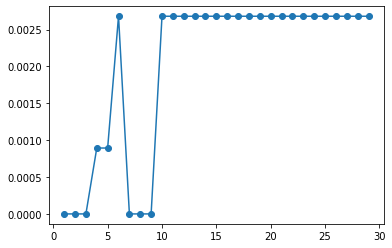

In [202]:
plt.plot(range(1,30), error_rate, marker='o')

In [113]:
#error rate seems to bottom out at k=1-3, and 7-9. Let's evaluate
#classifiers with those k values.

In [203]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_9 = KNeighborsClassifier(n_neighbors=9)

knn_2.fit(WS_48_train, y_train)
knn_3.fit(WS_48_train, y_train)
knn_7.fit(WS_48_train, y_train)
knn_8.fit(WS_48_train, y_train)
knn_9.fit(WS_48_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [204]:
pred_2 = knn_2.predict(WS_48_test)
pred_3 = knn_3.predict(WS_48_test)
pred_7 = knn_7.predict(WS_48_test)
pred_8 = knn_8.predict(WS_48_test)
pred_9 = knn_9.predict(WS_48_test)


In [208]:
print('k=2 \n')
print(confusion_matrix(pred_2, y_test))
print(classification_report(pred_2, y_test))

print('\nk=3\n')
print(confusion_matrix(pred_3, y_test))
print(classification_report(pred_3, y_test))

print('\nk=7\n')
print(confusion_matrix(pred_7, y_test))
print(classification_report(pred_7, y_test))

print('\nk=8\n')
print(confusion_matrix(pred_7, y_test))
print(classification_report(pred_7, y_test))

print('\nk=9\n')
print(confusion_matrix(pred_9, y_test))
print(classification_report(pred_9, y_test))

k=2 

[[1116    0]
 [   0    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119


k=3

[[1116    0]
 [   0    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119


k=7

[[1116    0]
 [   0    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1119
   macro avg       1.00      

In [284]:
#I think k=7 is the better model because having a higher k value
#will help with noise when using on other data.
#This is the best model based on WS/48 and USG% and retrained on the full
#data set.
WS_48_knn_7 = KNeighborsClassifier(n_neighbors=7)
WS_48_knn_7.fit(WS_48, use_data['MVP'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [211]:
#Let's check the difference if we use Offensive and Defensive Win Share separately:
ODWS = scaled_df[['OWS','DWS','USG%']]
y = use_data['MVP']
ODWS_train, ODWS_test, y_train, y_test = train_test_split(ODWS, y, test_size=0.33, random_state=42)

In [212]:
error_rate = []

for i in range(1,30):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(ODWS_train, y_train)
    pred_i = knn_i.predict(ODWS_test)
    error_rate.append(np.mean(pred_i != y_test))


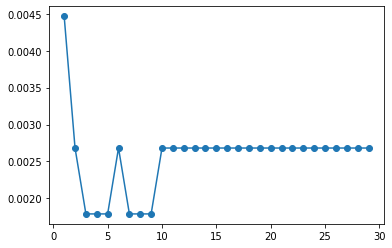

In [213]:
plt.plot(range(1,30), error_rate, marker='o')

In [214]:
#lowest error rates at 3-5 and 7-9
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_9 = KNeighborsClassifier(n_neighbors=9)

knn_3.fit(ODWS_train, y_train)
knn_4.fit(ODWS_train, y_train)
knn_5.fit(ODWS_train, y_train)
knn_7.fit(ODWS_train, y_train)
knn_8.fit(ODWS_train, y_train)
knn_9.fit(ODWS_train, y_train)

pred_3 = knn_3.predict(ODWS_test)
pred_4 = knn_4.predict(ODWS_test)
pred_5 = knn_5.predict(ODWS_test)
pred_7 = knn_7.predict(ODWS_test)
pred_8 = knn_8.predict(ODWS_test)
pred_9 = knn_9.predict(ODWS_test)

In [215]:
print('k = 3 \n')
print(confusion_matrix(y_test,pred_3))
print(classification_report(y_test,pred_3))

print('k = 4 \n')
print(confusion_matrix(y_test,pred_4))
print(classification_report(y_test,pred_4))

print('k = 5 \n')
print(confusion_matrix(y_test,pred_5))
print(classification_report(y_test,pred_5))

print('k = 7 \n')
print(confusion_matrix(y_test,pred_7))
print(classification_report(y_test,pred_7))

print('k = 8 \n')
print(confusion_matrix(y_test,pred_8))
print(classification_report(y_test,pred_8))

print('k = 9 \n')
print(confusion_matrix(y_test,pred_9))
print(classification_report(y_test,pred_9))



k = 3 

[[1116    0]
 [   2    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      0.33      0.50         3

    accuracy                           1.00      1119
   macro avg       1.00      0.67      0.75      1119
weighted avg       1.00      1.00      1.00      1119

k = 4 

[[1116    0]
 [   2    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      0.33      0.50         3

    accuracy                           1.00      1119
   macro avg       1.00      0.67      0.75      1119
weighted avg       1.00      1.00      1.00      1119

k = 5 

[[1116    0]
 [   2    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      0.33      0.50         3

    accuracy                           1.00      1119
   macro avg       1.00

In [139]:
#WS/48 has a much better recall and f1-score than OWS and DWS. It seems MVP
#voters do take into account a players statistical contribution per amount 
#he plays more than total contribution. This was noted in the visual analysis
#of the data. It led to more false negatives than in WS/48.

In [217]:
#Lets see if BPM and USG% is a better predictor than WS/48.
BPM = scaled_df[['BPM', 'USG%']]
y = use_data['MVP']
BPM_train, BPM_test, y_train, y_test = train_test_split(BPM, y, test_size=0.33, random_state=42)

In [218]:
error_rate = []

for i in range(1,30):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(BPM_train, y_train)
    pred_i = knn_i.predict(BPM_test)
    error_rate.append(np.mean(pred_i != y_test))


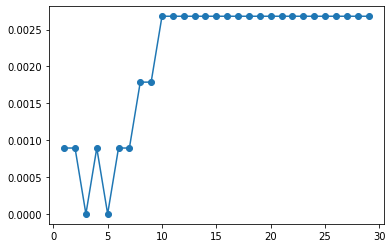

In [219]:
plt.plot(range(1,30), error_rate, marker='o')

In [220]:
#K has the lowest error rate at 3 and 5. We'll test those.

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_3.fit(BPM_train, y_train)
knn_5.fit(BPM_train, y_train)

pred_3 = knn_3.predict(BPM_test)
pred_5 = knn_5.predict(BPM_test)

In [221]:
print('k = 3 \n')
print(confusion_matrix(y_test,pred_3))
print(classification_report(y_test,pred_3))

print('k = 5 \n')
print(confusion_matrix(y_test,pred_5))
print(classification_report(y_test,pred_5))



k = 3 

[[1116    0]
 [   0    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

k = 5 

[[1116    0]
 [   0    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1116
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [288]:
#BPM is a perfect predictor with this data set, but leads me to
#believe we may have to be concerned with overfitting.
#This is the best model based on BPM and retrained on the full data set:
BPM_knn_5 = KNeighborsClassifier(n_neighbors=5)
BPM_knn_5.fit(BPM, use_data['MVP'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [268]:
#Lets test this on the 2020 NBA season thus far.

In [258]:
df_2020 = pd.read_csv('2020 YTD.csv')
df_2020.head()

Player  USG%  WS/48  BPM
0              Steven Adams\adamsst01  17.2  0.190  3.2
1               Bam Adebayo\adebaba01  20.8  0.175  3.6
2         LaMarcus Aldridge\aldrila01  23.6  0.122  1.3
3  Nickeil Alexander-Walker\alexani01  22.8 -0.034 -4.9
4             Grayson Allen\allengr01  17.9  0.070 -2.6

In [259]:
scaler = StandardScaler()
scaled_2020_features = scaler.fit(df_2020.drop('Player', axis=1))
scaled_2020_features = scaler.transform(df_2020.drop('Player', axis=1))

In [261]:
scaled_2020_df = pd.DataFrame(scaled_2020_features, columns=['USG%','WS/48','BPM'])

In [289]:
BPM_2020_pred = BPM_knn_5.predict(scaled_2020_df[['BPM','USG%']])

In [290]:
np.where(BPM_2020_pred == 1)

(array([], dtype=int64),)

In [285]:
#The BPM model does not predict an MVP in the data this year. The concern
#of overfitting is realized.

In [286]:
WS_48_2020_pred = WS_48_knn_7.predict(scaled_2020_df[['WS/48','USG%']])

In [287]:
np.where(WS_48_pred_2020 == 1)

(array([], dtype=int64),)

In [291]:
#The WS/48 model also doesn't predict an MVP for 2020. Overfitting strikes
#again!

In [46]:
#Need to resample the data to get a more balanced data set. I will use a
#combination of over samplilng and undersampling to achieve this.

In [55]:
df.describe

<bound method NDFrame.describe of                                   Player    Pos   Age   Tm     G    GS    MP  \
0                 Steven Adams\adamsst01      C  25.0  OKC  80.0  80.0  33.4   
1                  Bam Adebayo\adebaba01      C  21.0  MIA  82.0  28.0  23.3   
2            LaMarcus Aldridge\aldrila01      C  33.0  SAS  81.0  81.0  33.2   
3                Jarrett Allen\allenja01      C  20.0  BRK  80.0  80.0  26.2   
4              Al-Farouq Aminu\aminual01     PF  28.0  POR  81.0  81.0  28.3   
5              Justin Anderson\anderju01     SF  25.0  ATL  48.0   4.0   9.6   
6                Kyle Anderson\anderky01     SF  25.0  MEM  43.0  40.0  29.8   
7        Giannis Antetokounmpo\antetgi01     PF  24.0  MIL  72.0  72.0  32.8   
8                   OG Anunoby\anunoog01     SF  21.0  TOR  67.0   6.0  20.2   
9             Ryan Arcidiacono\arcidry01     PG  24.0  CHI  81.0  32.0  24.2   
10                Trevor Ariza\arizatr01     SF  33.0  TOT  69.0  69.0  34.0   
11    

In [58]:
dropped = df.dropna()


In [59]:
#lost ~15 entries. 
dropped.describe

<bound method NDFrame.describe of                                   Player    Pos   Age   Tm     G    GS    MP  \
0                 Steven Adams\adamsst01      C  25.0  OKC  80.0  80.0  33.4   
1                  Bam Adebayo\adebaba01      C  21.0  MIA  82.0  28.0  23.3   
2            LaMarcus Aldridge\aldrila01      C  33.0  SAS  81.0  81.0  33.2   
3                Jarrett Allen\allenja01      C  20.0  BRK  80.0  80.0  26.2   
4              Al-Farouq Aminu\aminual01     PF  28.0  POR  81.0  81.0  28.3   
5              Justin Anderson\anderju01     SF  25.0  ATL  48.0   4.0   9.6   
6                Kyle Anderson\anderky01     SF  25.0  MEM  43.0  40.0  29.8   
7        Giannis Antetokounmpo\antetgi01     PF  24.0  MIL  72.0  72.0  32.8   
8                   OG Anunoby\anunoog01     SF  21.0  TOR  67.0   6.0  20.2   
9             Ryan Arcidiacono\arcidry01     PG  24.0  CHI  81.0  32.0  24.2   
10                Trevor Ariza\arizatr01     SF  33.0  TOT  69.0  69.0  34.0   
11    

In [61]:
#no mvps had na values
fig = px.strip(dropped, x='Year', y='WS/48', color='MVP',hover_name='Player')
fig.show()

In [60]:
#save 1 final data set
dropped.to_csv(r'C:\Users\dylan\Documents\isMVP\NBA_2010_2019.csv', index=False)

In [42]:
resample_df=df[['Age','G','GS','MP','FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', 'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'MVP']]

In [53]:
#need to standardize the variables before resampling because
#SMOTE uses KNN to create lookalike data points

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaler.fit(resample_df.drop('MVP',axis=1))

StandardScaler()

In [46]:
scaled_features = scaler.transform(resample_df.drop('MVP', axis=1))

In [48]:
scaled_df = pd.DataFrame(scaled_features, columns=resample_df.columns[:-1])

In [60]:
#Now split into train and test sets and only resample the training data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,resample_df['MVP'],
                                                    test_size=0.30,random_state=42)

In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be impo

In [52]:
rus = RandomUnderSampler(sampling_strategy = 0.25) 

In [53]:
Counter(y_train)

Counter({0: 2364, 1: 7})

In [54]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [65]:
Counter(y_train_rus)

Counter({0: 28, 1: 7})

In [66]:
smote = SMOTE(sampling_strategy='auto')

In [67]:
X_SMOTE, y_SMOTE = smote.fit_resample(X_train_rus, y_train_rus)

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [69]:
Counter(y_SMOTE)
#Woo! Balanced data set!

Counter({0: 28, 1: 28})

In [ ]:
#Now use KNN to create a predictor.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
#find best K value using elbow method:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_SMOTE, y_SMOTE)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

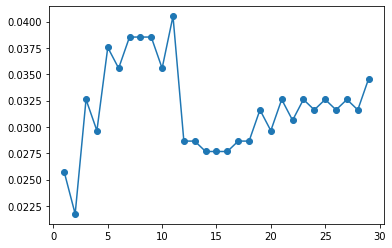

In [79]:
plt.plot(range(1,30), error_rate, marker='o')
#error rate bottoms out at K=2, another valley at K=14,15,16

In [80]:
#K = 2
knn_2 = KNeighborsClassifier(n_neighbors=2)

knn_2.fit(X_SMOTE, y_SMOTE)
pred_2 = knn_2.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred_2))
print('\n')
print(classification_report(y_test,pred_2))

WITH K=2


[[987  22]
 [  0   3]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1009
           1       0.12      1.00      0.21         3

    accuracy                           0.98      1012
   macro avg       0.56      0.99      0.60      1012
weighted avg       1.00      0.98      0.99      1012



In [81]:
#K = 14
knn_14 = KNeighborsClassifier(n_neighbors=14)

knn_14.fit(X_SMOTE, y_SMOTE)
pred_14 = knn_14.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred_14))
print('\n')
print(classification_report(y_test,pred_14))

WITH K=14


[[981  28]
 [  0   3]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1009
           1       0.10      1.00      0.18         3

    accuracy                           0.97      1012
   macro avg       0.55      0.99      0.58      1012
weighted avg       1.00      0.97      0.98      1012



In [83]:
#K = 15
knn_15 = KNeighborsClassifier(n_neighbors=15)

knn_15.fit(X_SMOTE, y_SMOTE)
pred_15 = knn_15.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred_15))
print('\n')
print(classification_report(y_test,pred_15))

WITH K=15


[[981  28]
 [  0   3]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1009
           1       0.10      1.00      0.18         3

    accuracy                           0.97      1012
   macro avg       0.55      0.99      0.58      1012
weighted avg       1.00      0.97      0.98      1012



In [85]:
#K = 16
knn_16 = KNeighborsClassifier(n_neighbors=16)

knn_16.fit(X_SMOTE, y_SMOTE)
pred_16 = knn_16.predict(X_test)

print('WITH K=16')
print('\n')
print(confusion_matrix(y_test,pred_16))
print('\n')
print(classification_report(y_test,pred_16))

WITH K=16


[[981  28]
 [  0   3]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1009
           1       0.10      1.00      0.18         3

    accuracy                           0.97      1012
   macro avg       0.55      0.99      0.58      1012
weighted avg       1.00      0.97      0.98      1012



In [ ]:
#There are some false positives with each K value but it did
#correctly predict each actual MVP correctly.

In [86]:
#lets test it on the current NBA stats YTD to see if we
#can predict who will be MVP

In [90]:
df2020 = pd.read_csv('2020 Stats YTD.csv')

In [91]:
df2020.columns

Index(['Rk', 'Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'FTr',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [92]:
df2020['3P%'].fillna(0)


0      0.333
1      0.077
2      0.389
3      0.350
4      0.394
5      0.000
6      0.313
7      0.250
8      0.300
9      0.260
10     0.200
11     0.312
12     0.000
13     0.000
14     0.380
15     0.393
16     0.391
17     0.372
18     0.352
19     0.400
20     0.350
21     0.333
22     0.284
23     0.182
24     0.378
25     0.346
26     0.382
27     0.380
28     0.320
29     0.375
30     0.330
31     0.330
32     0.000
33     0.286
34     0.351
35     0.344
36     0.327
37     0.386
38     0.311
39     0.353
40     0.388
41     0.360
42     0.426
43     0.363
44     0.333
45     0.222
46     0.667
47     0.231
48     0.349
49     0.444
50     0.324
51     0.424
52     0.388
53     0.000
54     0.167
55     0.000
56     0.422
57     0.348
58     0.362
59     0.414
60     0.500
61     0.000
62     0.000
63     0.000
64     0.000
65     0.200
66     0.383
67     0.365
68     0.280
69     0.000
70     0.308
71     0.364
72     1.000
73     0.000
74     0.111
75     0.000
76     0.351

In [94]:
df2020.dropna(inplace=True)

In [96]:
df2020.columns

Index(['Rk', 'Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'FTr',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [99]:
df2020_scale = df2020[['Age','G','GS','MP','FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', 'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP']]

In [101]:
scaler= StandardScaler()
scaler.fit(df2020_scale)
scaled_2020 = scaler.transform(df2020_scale)

In [102]:
#Test with K = 2

pred_2_2020 = knn_2.predict(scaled_2020)

In [120]:
#these are the spots where my predictor thinks the player will be MVP this year.
#Obviously too many.
MVPs = np.where(pred_2_2020 == 1)

In [106]:
df2020.reset_index(drop=True,inplace=True)

In [109]:
df2020.drop('Rk',axis=1,inplace=True)

KeyError: "['Rk'] not found in axis"

In [121]:
df2020.loc[MVPs]

Player  Age   G  GS    MP    FG   FGA    FG%  \
10   Giannis Antetokounmpo\antetgi01   25  60  60  30.7  11.0  19.9  0.552   
36             Bradley Beal\bealbr01   26  57  57  36.0  10.4  22.9  0.455   
61            Devin Booker\bookede01   23  65  65  36.1   8.8  18.2  0.486   
89            Jimmy Butler\butleji01   30  56  56  34.2   6.0  13.3  0.456   
141          Anthony Davis\davisan02   26  58  58  34.5   9.2  18.1  0.507   
147          DeMar DeRozan\derozde01   30  64  64  34.3   8.3  15.6  0.530   
155            Luka Dončić\doncilu01   20  57  57  33.7   9.6  20.7  0.462   
225           James Harden\hardeja01   30  64  64  36.8   9.8  22.5  0.438   
282           LeBron James\jamesle01   35  63  63  34.9   9.7  19.5  0.496   
295           Nikola Jokić\jokicni01   24  67  67  32.4   7.9  15.0  0.526   
331          Kawhi Leonard\leonaka01   28  54  54  32.2   9.2  19.8  0.467   
334         Damian Lillard\lillada01   29  61  61  37.2   9.1  20.0  0.454   
340             Kyle Lowry\lowryky01   33  54  54  36.5   5.9  14.2  0.417   
499           Jayson Tatum\tatumja01   21  62  62  34.6   8.4  18.8  0.445   
570             Trae Young\youngtr01   21  60  60  35.3   9.1  20.8  0.437   

      3P   3PA  ...    FTr  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  \
10   1.5   4.7  ...  0.498  37.4  6.1  4.9  11.0  0.286   7.7   4.2  11.8   
36   3.0   8.4  ...  0.351  34.4  4.6  0.5   5.0  0.118   5.3  -2.4   2.9   
61   2.1   5.7  ...  0.394  29.8  5.1  1.3   6.4  0.130   3.1  -1.4   1.7   
89   0.5   2.1  ...  0.686  25.1  6.3  2.6   8.9  0.223   4.0   1.3   5.4   
141  1.2   3.6  ...  0.475  29.7  6.7  4.3  11.0  0.265   5.9   2.8   8.7   
147  0.1   0.5  ...  0.423  26.4  5.6  1.2   6.7  0.148   2.2  -0.4   1.8   
155  2.8   8.9  ...  0.448  36.8  6.0  2.4   8.4  0.210   7.2   1.1   8.4   
225  4.4  12.5  ...  0.529  36.1  9.4  2.8  12.2  0.249   7.9   1.3   9.2   
282  2.2   6.3  ...  0.289  31.4  6.0  3.6   9.7  0.211   6.6   1.9   8.5   
295  1.1   3.5  ...  0.283  26.8  6.1  3.3   9.3  0.206   5.4   2.3   7.6   
331  2.1   5.7  ...  0.355  33.1  4.9  3.2   8.1  0.224   6.5   2.5   9.0   
334  3.9   9.9  ...  0.379  30.0  9.2  0.7   9.9  0.209   7.7  -0.9   6.8   
340  2.9   8.2  ...  0.418  23.2  4.3  3.0   7.3  0.177   2.5   0.9   3.4   
499  2.8   7.0  ...  0.257  28.5  3.0  3.4   6.4  0.143   3.3   0.5   3.8   
570  3.4   9.5  ...  0.448  34.9  5.3  0.5   5.9  0.133   6.3  -2.3   4.0   

     VORP  
10    6.5  
36    2.5  
61    2.2  
89    3.6  
141   5.4  
147   2.1  
155   5.0  
225   6.6  
282   5.8  
295   5.3  
331   4.8  
334   5.1  
340   2.7  
499   3.1  
570   3.2  

[15 rows x 39 columns]

In [122]:
#test with K=15

pred_15_2020 = knn_15.predict(scaled_2020)

In [134]:
MVPs_15 = np.where(pred_15_2020 == 1)

In [135]:
df2020.loc[MVPs_15]

Player  Age   G  GS    MP    FG   FGA    FG%  \
10   Giannis Antetokounmpo\antetgi01   25  60  60  30.7  11.0  19.9  0.552   
36             Bradley Beal\bealbr01   26  57  57  36.0  10.4  22.9  0.455   
61            Devin Booker\bookede01   23  65  65  36.1   8.8  18.2  0.486   
89            Jimmy Butler\butleji01   30  56  56  34.2   6.0  13.3  0.456   
141          Anthony Davis\davisan02   26  58  58  34.5   9.2  18.1  0.507   
155            Luka Dončić\doncilu01   20  57  57  33.7   9.6  20.7  0.462   
168            Joel Embiid\embiijo01   25  46  46  30.3   7.7  16.1  0.480   
225           James Harden\hardeja01   30  64  64  36.8   9.8  22.5  0.438   
282           LeBron James\jamesle01   35  63  63  34.9   9.7  19.5  0.496   
295           Nikola Jokić\jokicni01   24  67  67  32.4   7.9  15.0  0.526   
331          Kawhi Leonard\leonaka01   28  54  54  32.2   9.2  19.8  0.467   
334         Damian Lillard\lillada01   29  61  61  37.2   9.1  20.0  0.454   
435              Chris Paul\paulch01   34  65  65  31.8   6.3  12.8  0.491   
516     Karl-Anthony Towns\townska01   24  35  35  33.9   9.0  17.8  0.508   
570             Trae Young\youngtr01   21  60  60  35.3   9.1  20.8  0.437   

      3P   3PA  ...    FTr  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  \
10   1.5   4.7  ...  0.498  37.4  6.1  4.9  11.0  0.286   7.7   4.2  11.8   
36   3.0   8.4  ...  0.351  34.4  4.6  0.5   5.0  0.118   5.3  -2.4   2.9   
61   2.1   5.7  ...  0.394  29.8  5.1  1.3   6.4  0.130   3.1  -1.4   1.7   
89   0.5   2.1  ...  0.686  25.1  6.3  2.6   8.9  0.223   4.0   1.3   5.4   
141  1.2   3.6  ...  0.475  29.7  6.7  4.3  11.0  0.265   5.9   2.8   8.7   
155  2.8   8.9  ...  0.448  36.8  6.0  2.4   8.4  0.210   7.2   1.1   8.4   
168  1.2   3.7  ...  0.548  32.9  3.6  2.5   6.1  0.209   4.4   1.1   5.5   
225  4.4  12.5  ...  0.529  36.1  9.4  2.8  12.2  0.249   7.9   1.3   9.2   
282  2.2   6.3  ...  0.289  31.4  6.0  3.6   9.7  0.211   6.6   1.9   8.5   
295  1.1   3.5  ...  0.283  26.8  6.1  3.3   9.3  0.206   5.4   2.3   7.6   
331  2.1   5.7  ...  0.355  33.1  4.9  3.2   8.1  0.224   6.5   2.5   9.0   
334  3.9   9.9  ...  0.379  30.0  9.2  0.7   9.9  0.209   7.7  -0.9   6.8   
435  1.6   4.4  ...  0.311  23.3  5.7  2.6   8.4  0.194   3.1   1.2   4.3   
516  3.3   7.9  ...  0.363  28.8  3.8  1.3   5.1  0.205   7.0   0.8   7.8   
570  3.4   9.5  ...  0.448  34.9  5.3  0.5   5.9  0.133   6.3  -2.3   4.0   

     VORP  
10    6.5  
36    2.5  
61    2.2  
89    3.6  
141   5.4  
155   5.0  
168   2.6  
225   6.6  
282   5.8  
295   5.3  
331   4.8  
334   5.1  
435   3.3  
516   2.9  
570   3.2  

[15 rows x 39 columns]

In [164]:
#same list of MVPs. Let's try a different classifier.

In [62]:
probs_knn_15 = knn_15.predict_proba(scaled_2020)

NameError: name 'knn_15' is not defined

In [167]:
probs_knn_15[MVPs_15]

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.46666667, 0.53333333],
       [0.13333333, 0.86666667],
       [0.06666667, 0.93333333],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.        , 1.        ],
       [0.06666667, 0.93333333],
       [0.13333333, 0.86666667],
       [0.06666667, 0.93333333],
       [0.        , 1.        ],
       [0.46666667, 0.53333333],
       [0.33333333, 0.66666667],
       [0.13333333, 0.86666667]])

In [126]:
#Random Forests

from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc = RandomForestClassifier(n_estimators = 1000)

In [152]:
rfc.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(n_estimators=1000)

In [153]:
rfc_preds = rfc.predict(X_test)

In [154]:
print(classification_report(y_test, rfc_preds))
print(confusion_matrix(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1009
           1       0.15      1.00      0.26         3

    accuracy                           0.98      1012
   macro avg       0.57      0.99      0.63      1012
weighted avg       1.00      0.98      0.99      1012

[[992  17]
 [  0   3]]


In [155]:
#fewer false positives, could be a better predictor
rfc_2020_preds = rfc.predict(scaled_2020)

In [156]:
MVPs_rfc = np.where((rfc_2020_preds) == 1)

In [157]:
df2020.loc[MVPs_rfc]

Player  Age   G  GS    MP    FG   FGA    FG%  \
10   Giannis Antetokounmpo\antetgi01   25  60  60  30.7  11.0  19.9  0.552   
141          Anthony Davis\davisan02   26  58  58  34.5   9.2  18.1  0.507   
155            Luka Dončić\doncilu01   20  57  57  33.7   9.6  20.7  0.462   
225           James Harden\hardeja01   30  64  64  36.8   9.8  22.5  0.438   
282           LeBron James\jamesle01   35  63  63  34.9   9.7  19.5  0.496   
295           Nikola Jokić\jokicni01   24  67  67  32.4   7.9  15.0  0.526   
331          Kawhi Leonard\leonaka01   28  54  54  32.2   9.2  19.8  0.467   
334         Damian Lillard\lillada01   29  61  61  37.2   9.1  20.0  0.454   

      3P   3PA  ...    FTr  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  \
10   1.5   4.7  ...  0.498  37.4  6.1  4.9  11.0  0.286   7.7   4.2  11.8   
141  1.2   3.6  ...  0.475  29.7  6.7  4.3  11.0  0.265   5.9   2.8   8.7   
155  2.8   8.9  ...  0.448  36.8  6.0  2.4   8.4  0.210   7.2   1.1   8.4   
225  4.4  12.5  ...  0.529  36.1  9.4  2.8  12.2  0.249   7.9   1.3   9.2   
282  2.2   6.3  ...  0.289  31.4  6.0  3.6   9.7  0.211   6.6   1.9   8.5   
295  1.1   3.5  ...  0.283  26.8  6.1  3.3   9.3  0.206   5.4   2.3   7.6   
331  2.1   5.7  ...  0.355  33.1  4.9  3.2   8.1  0.224   6.5   2.5   9.0   
334  3.9   9.9  ...  0.379  30.0  9.2  0.7   9.9  0.209   7.7  -0.9   6.8   

     VORP  
10    6.5  
141   5.4  
155   5.0  
225   6.6  
282   5.8  
295   5.3  
331   4.8  
334   5.1  

[8 rows x 39 columns]

In [158]:
predicted_probs = rfc.predict_proba(scaled_2020)

In [163]:
predicted_probs[MVPs_rfc]

array([[0.09 , 0.91 ],
       [0.321, 0.679],
       [0.117, 0.883],
       [0.085, 0.915],
       [0.136, 0.864],
       [0.351, 0.649],
       [0.342, 0.658],
       [0.308, 0.692]])